## K-Means Clustering
### This is an unsupervised learning algorithm.

The algorithm works by grouping different clusters based on their mean.
K number of centroids are randomly initialised, and with each iteration the distance between each point od data and the centriod is found.

Eventually the centriod are placed in the centre of each cluster, this is the optimised solution.

The problem of finding out the K is solved by the Error-k graph.The knee of the graph is the most efficient K

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
m1, cov1 = [9,8], [[1.5, 2],[1, 2]]
m2, cov2 = [5,13], [[2.5, -1.5],[-1.5, 1.5]]
m3, cov3 = [3,7], [[0.25, 0.5],[-0.1, 0.5]]

data1  = np.random.multivariate_normal(m1, cov1, 250)
data2  = np.random.multivariate_normal(m2, cov2, 180)
data3  = np.random.multivariate_normal(m3, cov3, 100)

X= np.vstack((data1, data2, data3))
X.shape

<ipython-input-3-8e801d4e8591>:5: RuntimeWarning: covariance is not positive-semidefinite.
  data1  = np.random.multivariate_normal(m1, cov1, 250)
<ipython-input-3-8e801d4e8591>:7: RuntimeWarning: covariance is not positive-semidefinite.
  data3  = np.random.multivariate_normal(m3, cov3, 100)


(530, 2)

In [4]:
np.random.shuffle(X)

In [17]:
def kMeans(X, k=3, max_iters=15):
    m = X.shape[0]
    centroid_index = np.random.choice(np.arange(m), k)
    centroids = X[centroid_index, :]
    
    for i in range(max_iters):
#         C =[]
#         for x in X:
#             distances = []
#             for c in centroids:
#                 d = np.dot(x-c, x-c)
#                 distances.append(d)
#             ci = np.argmin(distances)
#             C.append(ci)
#         C=np.asarray(C)
        C = np.asarray([np.argmin([np.dot(x-c, x-c) for c in centroids])for x in X])
        centroids = [X[C==ci].mean(axis=0) for ci in range(k)]
            
    return np.asarray(centroids), C

In [18]:
centroids, C = kMeans(X, k=3)
print(centroids)

[[ 4.72885256 13.15538258]
 [ 9.10885238  8.26500366]
 [ 3.17599399  6.78866842]]


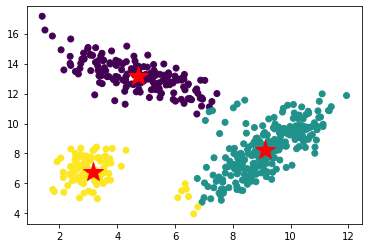

In [19]:
plt.scatter(X[:, 0], X[:,1], c=C)
plt.plot(centroids[:,0], centroids[:,1], '*r', markersize=20)
plt.show()

### Image Compression using K-Means

In [20]:
!pip install opencv-python

In [33]:
import cv2

In [34]:
im = cv2.imread('Img/Adesh Photo.jpg')

In [35]:
h, w, c = im.shape

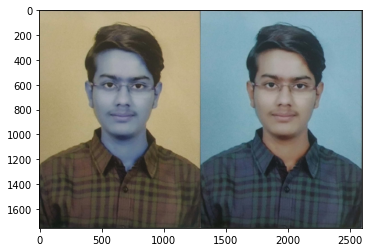

In [36]:
image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack((im, image)))
plt.show()

In [37]:
from sklearn.cluster import MiniBatchKMeans

In [38]:
flatImg = image.reshape(h*w, 3)
flatImg.shape

(2278900, 3)

In [69]:
clt = MiniBatchKMeans(n_clusters=16)
labels = clt.fit_predict(flatImg)

In [70]:
labels.shape

(2278900,)

In [71]:
centroids = clt.cluster_centers_.astype('uint8')

In [72]:
res = centroids[labels]

In [73]:
resimg = res.reshape(h,w,c)

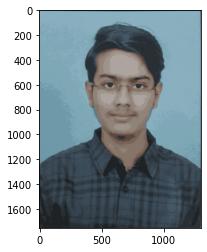

In [74]:
plt.imshow(resimg)
plt.show()

In [77]:
outimg = cv2.cvtColor(resimg, cv2.COLOR_RGB2BGR)
cv2.imwrite('Img/compressedAdeshphoto.jpg', outimg)

True